# Testing
In this notebook we will test the saved model with some images.

## Imports

In [1]:
import sys
import os

sys.path.append(os.path.abspath('../scripts'))

import matplotlib.pyplot as plt
import torch
from PIL import Image
from torch import Tensor

from scripts.predict import predict
from scripts.transformer import transform

## Vars

In [2]:
test_image_path = '../.data/output/test.png'
model_path = '../scripts/model/model.tar'
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Functions

In [3]:
def showim(image: Tensor, invert=False):
    plt.figure(figsize=(6, 6))
    plt.imshow(1 - image if invert else image, cmap='gray')
    plt.axis('off')
    plt.show()
    

def plot_prediction(percentages: dict):
    fig, ax = plt.subplots()
    p = ax.bar(percentages.keys(), percentages.values())
    ax.bar_label(p, label_type='center', fmt='%.2f%%')
    plt.show()

## Testing

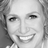

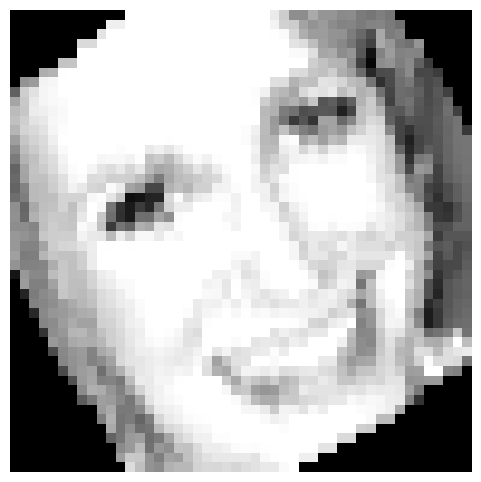

In [4]:
image = Image.open(test_image_path)

display(image)

_, trans_image = transform(image)

showim(trans_image[0, :, :])

## Predict the emotion

In [6]:
prediction, percentages = predict(trans_image)

Predicted emotion: Happy


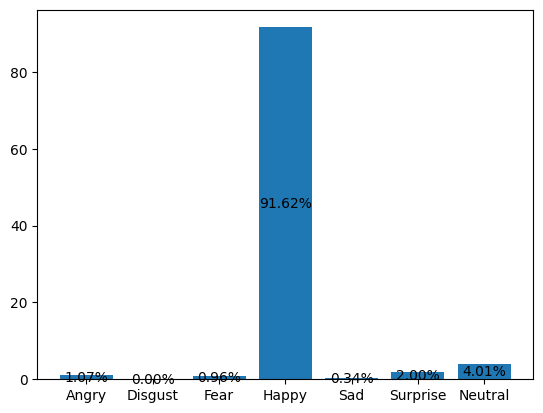

In [7]:
print(f'Predicted emotion: {prediction}')
plot_prediction(percentages)